https://www.datacamp.com/community/tutorials/scope-of-variables-python

## Scope of Variables in Python

In [1]:
# Variable

# A variable is a label or a name given to a certain location in memory. 
# This location holds the value you want your program to remember, for use later on. 

# What's great in Python is that you do not have to explicitly state what 
# the type of variable you want to define is - it can be of any type 
# (string, integer, float, etc.). 

first_string_var = "First String"  
first_int_var = 1
total = 1 + 2 * 3

## Variable Scope

Now that you know how to initialize a variable.

Let's talk about the scope of these variables. 

Not all variables can be accessed from anywhere in a program. 

The part of a program where a variable is accessible is called its **scope**.

There are **four** major types of variable scope and is the basis for the LEGB rule. 

LEGB stands for Local -> Enclosing -> Global -> Built-in.

### Local Scope

Whenever you define a variable **within** a function, its scope lies **ONLY** within the function. 

It is accessible from the point at which it is defined until the end of the function and **exists for as long as the function is executing**. 

Which means its value cannot be changed or even accessed from outside the function.

In [2]:
def print_number():
    first_num = 1
    # Print statement 1
    print("The first number defined is: ", first_num)

print_number()

# Print statement 2
print("The first number defined is: ", first_num)

The first number defined is:  1


NameError: name 'first_num' is not defined

## Enclosing Scope

What if we have a nested function (function defined inside another function)? 

How does the scope change? 

Let's see with the help of an example.

In [3]:
def outer():
    first_num = 1
    
    def inner():
        second_num = 2
        # Print statement 1 - Scope: Inner
        print("first_num from outer: ", first_num)
        # Print statement 2 - Scope: Inner
        print("second_num from inner: ", second_num)
        
    inner()
    # Print statement 3 - Scope: Outer
    print("second_num from inner: ", second_num)

outer()

first_num from outer:  1
second_num from inner:  2


NameError: name 'second_num' is not defined

### Global Scope

Whenever a variable is defined **outside any function**, it becomes a global variable, and its scope is anywhere within the program. 

Which means it can be used by any function.


In [4]:
# Example 1
a = 1

def test(a):
    a += 1
    return a

a = test(a)

a

2

In [5]:
# Example 2
a = 1

def test(a):
    a += 1

test(a)

a

1

In [6]:
greeting = "Hello"

def greeting_world():
    world = "World"
    print(greeting, world)

def greeting_name(name):
    print(greeting, name)

greeting_world()
greeting_name("Samuel")

Hello World
Hello Samuel


## Built-in Scope

This is the widest scope that exists! 

All the special reserved keywords fall under this scope. 

We can call the keywords anywhere within our program without having to define them before use.

Keywords are simply special reserved words. 

They are kept for specific purposes and cannot be used for any other purpose in the program.

These are the keywords in Python:

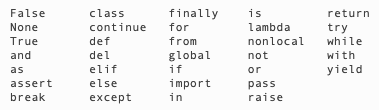

## Scenario 1: Global Scope
Let's say you wanted to be able to change the global variable **greeting**("Hello") to set a new value ("Hi") for the greeting, so that greeting_world() prints "Hi World"

In [7]:
greeting = "Hello"

def change_greeting(new_greeting):
    greeting = new_greeting

def greeting_world():
    world = "World"
    print(greeting, world)

change_greeting("Hi")
greeting_world()

Hello World


Well...that did not go as wanted! Why?

This is because when we set the value of greeting to "Hi", it created **a new local variable greeting** in the scope of change_greeting(). 

It did not change anything for the global greeting. This is where the global keyword comes in handy.

## Global Keyword

With global, you're telling Python to **use the globally defined variable** instead of locally creating one. 

To use the keyword, simply type 'global', followed by the variable name. Let's see this in action on Scenario 1.

In [8]:
greeting = "Hello"

def change_greeting(new_greeting):
    global greeting
    greeting = new_greeting

def greeting_world():
    world = "World"
    print(greeting, world)

change_greeting("Hi")
greeting_world()

Hi World


## Scenario 2: Enclosing Scope

Here, we have a look at the outer() and inner() nested functions from the Enclosing Scope example. 

Let's try to change the value of first_num from 1 to 0 from within inner().

In [9]:
def outer():
    first_num = 1
    
    def inner():
        first_num = 0
        second_num = 1
        print("inner - second_num is: ", second_num)
    
    inner()
    print("outer - first_num is: ", first_num)

outer()

inner - second_num is:  1
outer - first_num is:  1


It isn't always that simple, is it! For such purposes, we make use of nonlocal keyword within Python.

## Nonlocal Keyword

This is another handy keyword that allows us to work more flexibly and tidily with variable scopes. 

The nonlocal keyword is useful in nested functions. 

It causes the variable to refer to the previously bound variable in the closest enclosing scope. 

In other words, it will prevent the variable from trying to bind locally first, and force it to go a level 'higher up'. 

The syntax is similar to the global keyword.

In [10]:
def outer():
    first_num = 1
    
    def inner():
        nonlocal first_num
        first_num = 0
        second_num = 1
        print("inner - second_num is: ", second_num)
    
    inner()
    print("outer - first_num is: ", first_num)

outer()

inner - second_num is:  1
outer - first_num is:  0
